In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm
from py_vollib.black_scholes.implied_volatility import implied_volatility

In [2]:
ticker = 'TSLA'
expiry = '2023-04-06'

In [3]:
option_chain = yf.Ticker(ticker).option_chain(expiry)
calls = option_chain.calls
puts = option_chain.puts

In [4]:
# Define the Black-Scholes formula for a call option
def bs_call(S, K, r, t, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S*norm.cdf(d1) - K*np.exp(-r*t)*norm.cdf(d2)

# Define the Black-Scholes formula for a put option
def bs_put(S, K, r, t, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return K*np.exp(-r*t)*norm.cdf(-d2) - S*norm.cdf(-d1)

In [5]:
# Print the resulting dataframes with implied volatility columns
print('Calls:')
print(calls)
print('\n')
print('Puts:')
print(puts)

Calls:
         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0   TSLA230406C00030000 2023-03-15 17:56:08+00:00    30.0     148.00  149.85   
1   TSLA230406C00050000 2023-03-03 16:23:30+00:00    50.0     147.16  129.90   
2   TSLA230406C00080000 2023-03-16 16:46:51+00:00    80.0     104.71  100.05   
3   TSLA230406C00095000 2023-03-17 13:33:20+00:00    95.0      89.90   85.15   
4   TSLA230406C00100000 2023-03-17 19:55:12+00:00   100.0      80.50   80.15   
..                  ...                       ...     ...        ...     ...   
63  TSLA230406C00320000 2023-03-17 19:26:44+00:00   320.0       0.03    0.02   
64  TSLA230406C00330000 2023-03-16 17:55:12+00:00   330.0       0.03    0.02   
65  TSLA230406C00340000 2023-03-17 19:31:46+00:00   340.0       0.02    0.02   
66  TSLA230406C00350000 2023-03-16 19:39:35+00:00   350.0       0.02    0.01   
67  TSLA230406C00360000 2023-03-17 13:30:09+00:00   360.0       0.03    0.01   

       ask  change  percentChang

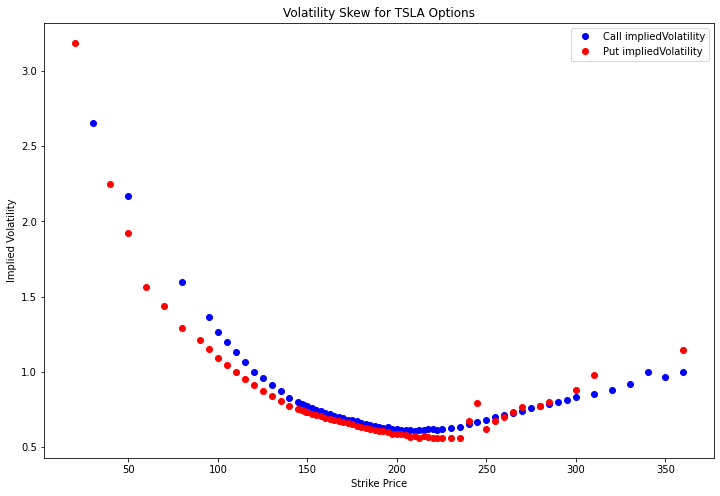

In [6]:
fig = plt.figure(figsize=(12, 8))
plt.plot(calls['strike'], calls['impliedVolatility'], 'bo', label='Call impliedVolatility')
plt.plot(puts['strike'], puts['impliedVolatility'], 'ro', label='Put impliedVolatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Skew for '+ticker+' Options')
plt.legend()
plt.show()